# Assignment 4: Introduction to Machine Learning

### Amirhossein Abaskohi                               STD:810197539

#### Intriduction:

#### Phase0

First we import the needed libraries for the project. These libraries are `Pandas` for accessing and manipulating data, `Matplotlib`, and `Seaborn` for plottning. Also we will use `Numpy` for some useful function such as `Log`. Also we `Counter` that is useful for counting data in a list.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

Here for having better visualiztion we will change some settings about pandas. Also we will set size of train data that will be useful later.

Then we will open our train data set and show first 10 rows of this data set.

In [2]:
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 500)
DATA_ROWS_NUM = 1460 

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.set_index('Id', inplace=True)
test_data.set_index('Id', inplace=True)
train_data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [4]:
test_data.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

##### Task1:
Here we will get useful information such columns' data types, each columns' mean, and etc about data set using `describe` and `info` methods.

As We can see data is incomplete and some values or unknown. Also more than half of data set columns are non-numerical. Working with these non-numerical data is hard.

In [5]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

##### Task2:
Here we are going to find what percentage of values in one column is Nan or unknown. Here we will use `isna` that returns a value is Nan or not. Then we will use `sum` method to count number of Nan values in each column. Then we will calculate th percentage of Nan values in each columns by dividing that count by number of rows in data set(that is 1460 and set in DATA_ROWS_NUM) and multplying by 100.

Also we sould mention that these percentages are not true because we have Na(not as Nan) values in dataset.

In [7]:
columns_with_na_types = {'Alley', 'MasVnrType', 'MasVnrArea','BsmtQual',
                         'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                         'FireplaceQu', 'GarageType', 'GarageYrBlt',
                         'GarageFinish', 'GarageQual', 'GarageCond',
                         'PoolQC', 'Fence', 'MiscFeature'}
sum_of_nans = train_data.isna().sum()
percentage_of_nans = sum_of_nans*100/DATA_ROWS_NUM
for index, value in percentage_of_nans.items():
    if index in columns_with_na_types:
        percentage_of_nans[index] = 0.0

##### Task3:
Now we want to find the correlation between each columns. Notice that we can calculate correlation coefficient of two random variables when they have numerical data. As we mentioned before we have some columns which their values are non-numerical. So we sould find a solution for them. Easily we can pass up them. So we should drop them, but easily `corr` method that calculates correlation coefficient of each two random variables would not consider these non-numerical columns.

After finding correlation coefficient we will draw hitmap of thise coefficient using `seaborn` module. Below you can see the output. Each index which is darker has higher cofficint. Positive and higher coefficents show that two random variables has more effect on each other. As the definition of correlation coefficent, left to right diameter is one and hitmap is symmetric.

Now we should find four elements that have higher influence on price. We will look at price column and will choose those features which are:

* OveralQual
* GrLivArea
* GarageCar
* YearBuilt
* TotalBsmSF
* 1StFlrSF

Text(0.5, 1.0, 'Multi-Collinearity of Houses Attributes')

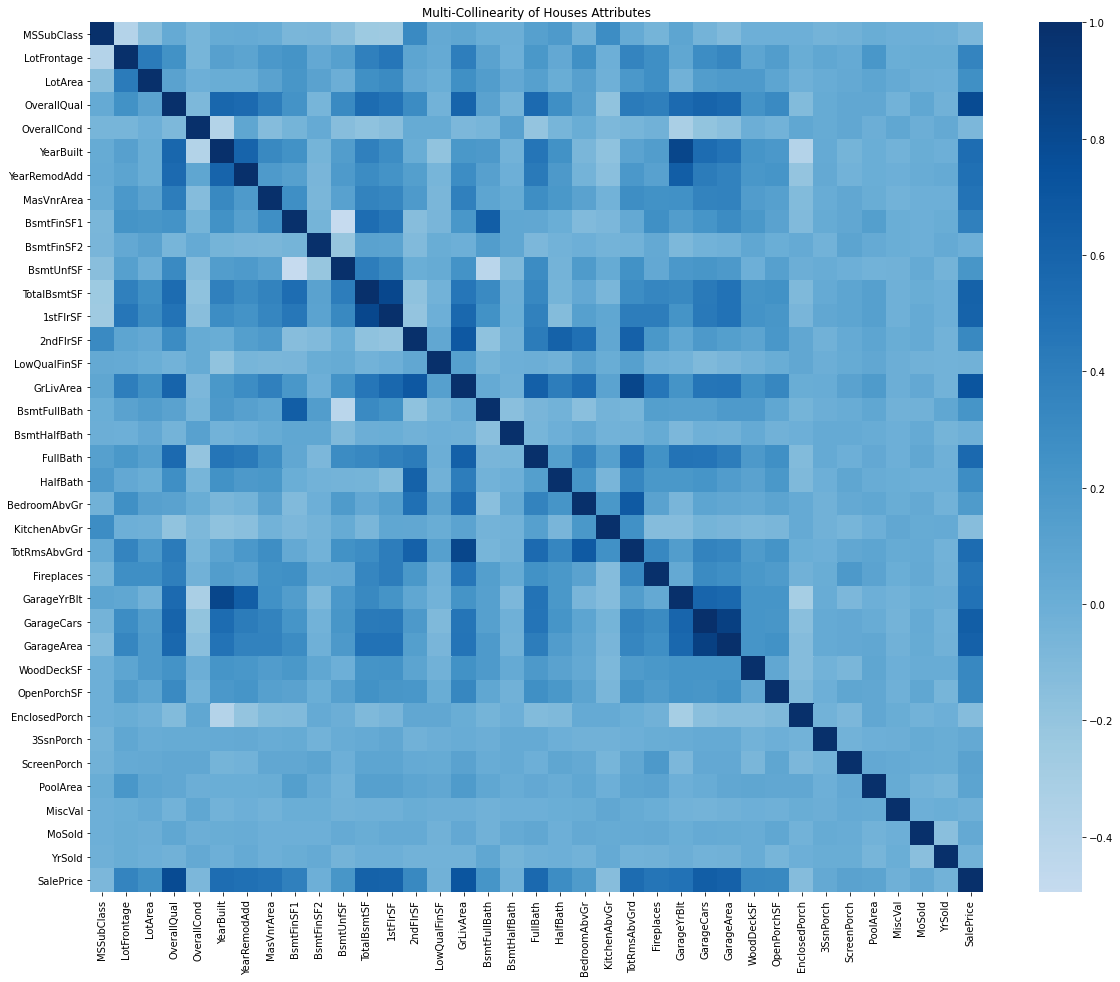

In [8]:
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(train_data.corr(), center=0, cmap='Blues')
ax.set_title('Multi-Collinearity of Houses Attributes')

Text(0.5, 1.0, 'Multi-Collinearity of Houses Attributes With Absolute Value')

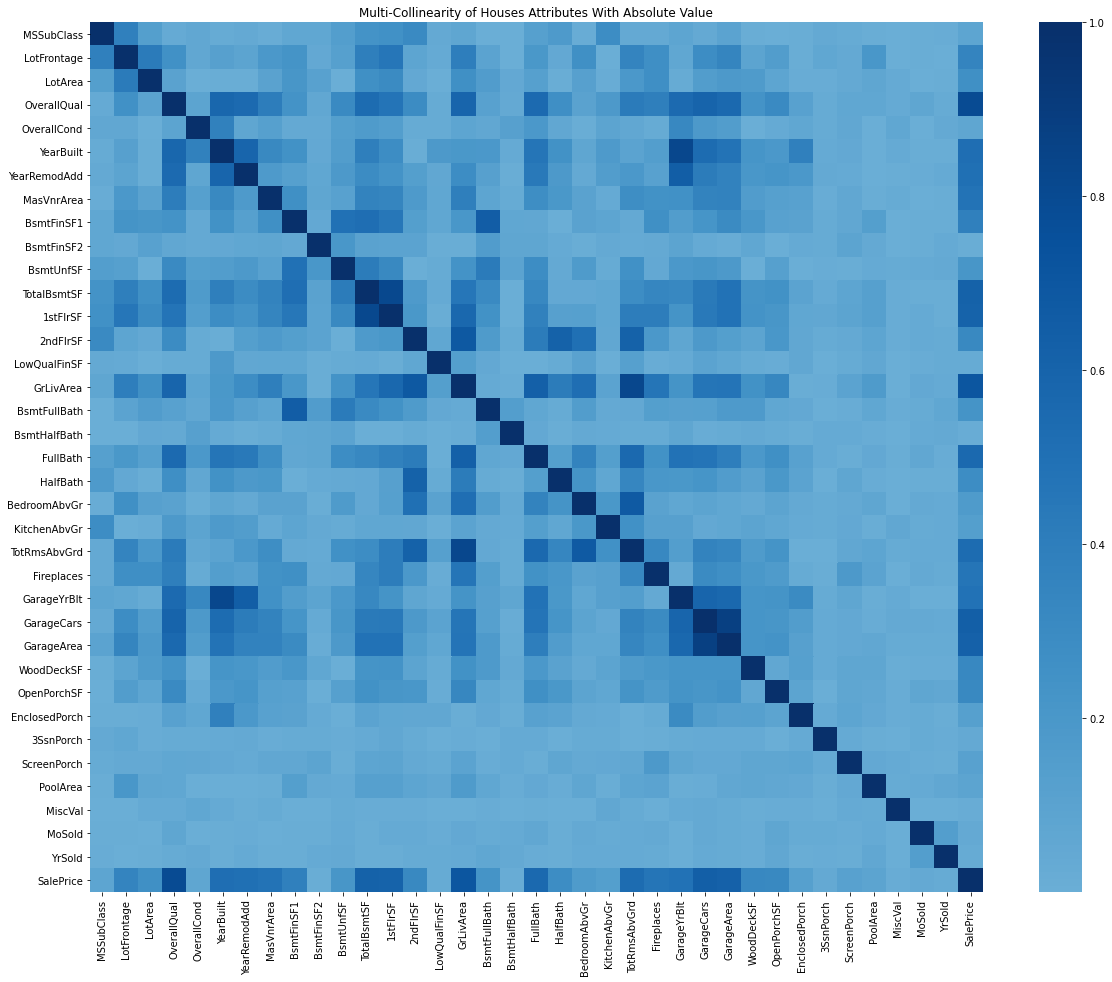

In [9]:
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(train_data.corr().abs(), center=0, cmap='Blues')
ax.set_title('Multi-Collinearity of Houses Attributes With Absolute Value')

##### Task4:
Now we will take logarithm of price columns. Maybe we coclude wrongly that where is no difference between two hitmaps, but that's not true. To have better conclusion we will use the `corr` output table. As we can see there are little differneces between that correlation coefficients in price columns. So taking `Log` has influence. But we can do something to not have any effect. Also we should mention that this influence is because we changes the values so `Covariance` and `Variance` have been changed so we have diffenrent value.

There are multiple different types of correlation. The most common one is <a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">Pearson's correlation</a> coefficient, which measures the amount of linear dependence between two vectors. That is, it essentially lays a straight line through the scatterplot and calculates its slope. This will of course change if you take logs!

If you are interested in a measure of correlation that is invariant under monotone transformations like the logarithm, use <a href="https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient">Kendall's rank correlation</a> or <a href="https://en.wikipedia.org/wiki/Spearman's_rank_correlation_coefficient">Spearman's rank correlation</a>. These only work on ranks, which do not change under monotone transformations.
    
Also in `corr` method we have method argument. Default it is `Pearson` but we can change that. You can see that we used another method that correlation coefficient is changed.

In [10]:
log_train_data = train_data.copy(deep=True)
log_train_data['SalePrice'] = np.log10(log_train_data['SalePrice'])

Text(0.5, 1.0, 'Multi-Collinearity of Houses Attributes When Using Log of Prices')

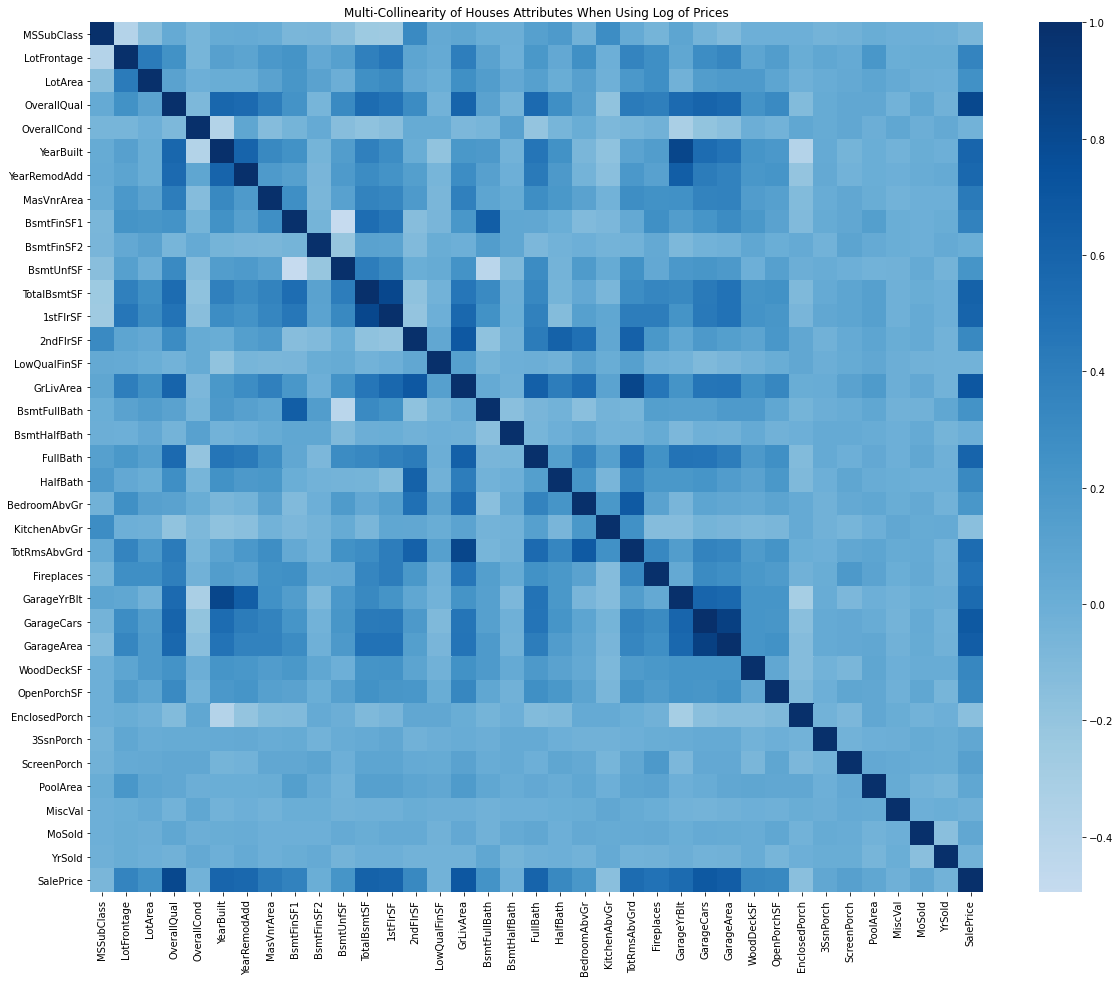

In [11]:
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(log_train_data.corr(), center=0, cmap='Blues')
ax.set_title('Multi-Collinearity of Houses Attributes When Using Log of Prices')

In [12]:
log_train_data.corr(method='spearman')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.314265,-0.269570,0.108065,-0.071770,0.035848,0.006802,0.025035,-0.107629,-0.083871,-0.117603,-0.318897,-0.278318,0.487749,0.075794,0.203576,-0.042017,0.002480,0.194912,0.282632,0.068763,0.277162,0.165825,0.019480,0.079268,0.024226,-0.047133,0.023370,0.031900,0.011023,-0.035830,-0.021673,0.033250,-0.032840,0.018403,-0.027401,0.007192
LotFrontage,-0.314265,1.000000,0.649633,0.254952,-0.083242,0.194510,0.116772,0.258906,0.154014,0.052516,0.119436,0.386206,0.427678,0.055111,-0.030230,0.375844,0.085990,-0.003854,0.220234,0.096777,0.327679,0.002231,0.365999,0.245315,0.115694,0.351756,0.378052,0.109288,0.178073,-0.095811,0.063960,0.043849,0.084534,0.024198,0.025758,0.003461,0.409076
LotArea,-0.269570,0.649633,1.000000,0.233303,-0.046912,0.103385,0.075158,0.177539,0.171995,0.072019,0.077830,0.366197,0.443858,0.119356,-0.020255,0.449040,0.095609,0.045970,0.235377,0.142658,0.337788,-0.022752,0.405924,0.350198,0.041796,0.340195,0.367153,0.184285,0.176965,-0.066563,0.062282,0.092316,0.084460,0.059297,0.006423,-0.027473,0.456461
OverallQual,0.108065,0.254952,0.233303,1.000000,-0.177521,0.647392,0.557723,0.413500,0.132957,-0.117560,0.272939,0.459915,0.408730,0.289561,-0.034029,0.603262,0.098034,-0.050598,0.576372,0.298455,0.121517,-0.192439,0.427806,0.420626,0.618193,0.608756,0.541552,0.259439,0.435046,-0.162434,0.032903,0.046335,0.056667,-0.088019,0.061455,-0.025464,0.809829
OverallCond,-0.071770,-0.083242,-0.046912,-0.177521,1.000000,-0.416964,-0.041464,-0.179187,-0.011087,0.102471,-0.128270,-0.217375,-0.166686,0.001111,0.039556,-0.153720,-0.052676,0.116015,-0.262400,-0.071342,-0.003713,-0.099754,-0.104919,-0.045383,-0.379398,-0.254763,-0.200718,-0.042662,-0.133284,0.109749,0.032384,0.074728,-0.005605,0.086625,-0.007203,0.050214,-0.129325
YearBuilt,0.035848,0.194510,0.103385,0.647392,-0.416964,1.000000,0.684388,0.402349,0.189645,-0.111692,0.139014,0.427187,0.293363,0.029716,-0.145936,0.288493,0.162080,-0.066313,0.537420,0.244901,-0.035257,-0.155604,0.176820,0.174655,0.890546,0.601519,0.528281,0.287729,0.392691,-0.408622,0.022498,-0.073119,0.008986,-0.091786,0.018621,-0.014100,0.652682
YearRemodAdd,0.006802,0.116772,0.075158,0.557723,-0.041464,0.684388,1.000000,0.234333,0.063353,-0.126086,0.176921,0.299042,0.240265,0.073049,-0.064542,0.282400,0.099904,-0.031495,0.431390,0.151562,-0.054371,-0.154208,0.198243,0.119270,0.722377,0.456245,0.398267,0.230241,0.353325,-0.235037,0.051694,-0.045808,0.002821,-0.090868,0.021081,0.045158,0.571159
MasVnrArea,0.025035,0.258906,0.177539,0.413500,-0.179187,0.402349,0.234333,1.000000,0.241565,-0.061342,0.075561,0.360104,0.352351,0.063162,-0.106994,0.322678,0.121004,0.032870,0.290366,0.168776,0.113137,-0.049387,0.263912,0.255627,0.305964,0.401606,0.364755,0.173736,0.208681,-0.179589,0.040997,0.038171,0.004863,-0.050279,0.017732,0.000552,0.421309
BsmtFinSF1,-0.107629,0.154014,0.171995,0.132957,-0.011087,0.189645,0.063353,0.241565,1.000000,0.050398,-0.573638,0.410413,0.323478,-0.191236,-0.079054,0.057471,0.674175,0.090712,0.011986,-0.013907,-0.084164,-0.106369,-0.050062,0.192264,0.078935,0.181381,0.244161,0.179359,0.081420,-0.148339,0.046802,0.071989,0.057586,0.005097,-0.016405,0.020793,0.301871
BsmtFinSF2,-0.083871,0.052516,0.072019,-0.117560,0.102471,-0.111692,-0.126086,-0.061342,0.050398,1.000000,-0.271007,0.070156,0.067461,-0.101564,0.001716,-0.051507,0.154021,0.124689,-0.105592,-0.049704,0.009767,-0.037256,-0.059362,0.029886,-0.153579,-0.064166,-0.007295,0.069343,-0.068991,0.041524,-0.016079,0.058716,0.068076,0.030363,-0.025808,0.026054,-0.038806


In [13]:
train_data.corr(method='spearman')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.314265,-0.269570,0.108065,-0.071770,0.035848,0.006802,0.025035,-0.107629,-0.083871,-0.117603,-0.318897,-0.278318,0.487749,0.075794,0.203576,-0.042017,0.002480,0.194912,0.282632,0.068763,0.277162,0.165825,0.019480,0.079268,0.024226,-0.047133,0.023370,0.031900,0.011023,-0.035830,-0.021673,0.033250,-0.032840,0.018403,-0.027401,0.007192
LotFrontage,-0.314265,1.000000,0.649633,0.254952,-0.083242,0.194510,0.116772,0.258906,0.154014,0.052516,0.119436,0.386206,0.427678,0.055111,-0.030230,0.375844,0.085990,-0.003854,0.220234,0.096777,0.327679,0.002231,0.365999,0.245315,0.115694,0.351756,0.378052,0.109288,0.178073,-0.095811,0.063960,0.043849,0.084534,0.024198,0.025758,0.003461,0.409076
LotArea,-0.269570,0.649633,1.000000,0.233303,-0.046912,0.103385,0.075158,0.177539,0.171995,0.072019,0.077830,0.366197,0.443858,0.119356,-0.020255,0.449040,0.095609,0.045970,0.235377,0.142658,0.337788,-0.022752,0.405924,0.350198,0.041796,0.340195,0.367153,0.184285,0.176965,-0.066563,0.062282,0.092316,0.084460,0.059297,0.006423,-0.027473,0.456461
OverallQual,0.108065,0.254952,0.233303,1.000000,-0.177521,0.647392,0.557723,0.413500,0.132957,-0.117560,0.272939,0.459915,0.408730,0.289561,-0.034029,0.603262,0.098034,-0.050598,0.576372,0.298455,0.121517,-0.192439,0.427806,0.420626,0.618193,0.608756,0.541552,0.259439,0.435046,-0.162434,0.032903,0.046335,0.056667,-0.088019,0.061455,-0.025464,0.809829
OverallCond,-0.071770,-0.083242,-0.046912,-0.177521,1.000000,-0.416964,-0.041464,-0.179187,-0.011087,0.102471,-0.128270,-0.217375,-0.166686,0.001111,0.039556,-0.153720,-0.052676,0.116015,-0.262400,-0.071342,-0.003713,-0.099754,-0.104919,-0.045383,-0.379398,-0.254763,-0.200718,-0.042662,-0.133284,0.109749,0.032384,0.074728,-0.005605,0.086625,-0.007203,0.050214,-0.129325
YearBuilt,0.035848,0.194510,0.103385,0.647392,-0.416964,1.000000,0.684388,0.402349,0.189645,-0.111692,0.139014,0.427187,0.293363,0.029716,-0.145936,0.288493,0.162080,-0.066313,0.537420,0.244901,-0.035257,-0.155604,0.176820,0.174655,0.890546,0.601519,0.528281,0.287729,0.392691,-0.408622,0.022498,-0.073119,0.008986,-0.091786,0.018621,-0.014100,0.652682
YearRemodAdd,0.006802,0.116772,0.075158,0.557723,-0.041464,0.684388,1.000000,0.234333,0.063353,-0.126086,0.176921,0.299042,0.240265,0.073049,-0.064542,0.282400,0.099904,-0.031495,0.431390,0.151562,-0.054371,-0.154208,0.198243,0.119270,0.722377,0.456245,0.398267,0.230241,0.353325,-0.235037,0.051694,-0.045808,0.002821,-0.090868,0.021081,0.045158,0.571159
MasVnrArea,0.025035,0.258906,0.177539,0.413500,-0.179187,0.402349,0.234333,1.000000,0.241565,-0.061342,0.075561,0.360104,0.352351,0.063162,-0.106994,0.322678,0.121004,0.032870,0.290366,0.168776,0.113137,-0.049387,0.263912,0.255627,0.305964,0.401606,0.364755,0.173736,0.208681,-0.179589,0.040997,0.038171,0.004863,-0.050279,0.017732,0.000552,0.421309
BsmtFinSF1,-0.107629,0.154014,0.171995,0.132957,-0.011087,0.189645,0.063353,0.241565,1.000000,0.050398,-0.573638,0.410413,0.323478,-0.191236,-0.079054,0.057471,0.674175,0.090712,0.011986,-0.013907,-0.084164,-0.106369,-0.050062,0.192264,0.078935,0.181381,0.244161,0.179359,0.081420,-0.148339,0.046802,0.071989,0.057586,0.005097,-0.016405,0.020793,0.301871
BsmtFinSF2,-0.083871,0.052516,0.072019,-0.117560,0.102471,-0.111692,-0.126086,-0.061342,0.050398,1.000000,-0.271007,0.070156,0.067461,-0.101564,0.001716,-0.051507,0.154021,0.124689,-0.105592,-0.049704,0.009767,-0.037256,-0.059362,0.029886,-0.153579,-0.064166,-0.007295,0.069343,-0.068991,0.041524,-0.016079,0.058716,0.068076,0.030363,-0.025808,0.026054,-0.038806


In [14]:
log_train_data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355878
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817184
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832


In [15]:
train_data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [16]:
correlations = train_data.corr().abs()

##### Task5:
As mentioned before using correlation we just attention to numericl value, but we know that we have non-numerical data that have big influence on the result which is price here. So we are not cosidering non-numerical values.

##### Task6:
Now we are going to examine deeper.

For OverallQual we can see that as we get higher OverallQual we have more price, but the houses with high OverallQual are not that much. More houses have OverallQual about six. So we can say more OverallQual more price.

For GrLivArea we can see that as the the values increases we have the price also goes up, but when GrLivArea is too much price is down. So we can say that it has effect one price but it is hard to predict out of special bound that we have weird output. Also we can sat that the most of houses about 1500 GrLivArea and their price is about 200000.

About GarageCars we can say that it has OveralQual features and GrLivArea. When it is too much it is not goof but generally more GarageCars. more price. The most of most of domain containsis about 3 and 2.

For OverallQual and GarageCars we should pay attention that although we have increases in mean of values in each type but in each type we have significant number of houses that have low prices. So it is a bad thing for these feature. Also we have this problem with two oter features but it is less in them.

About year build we should pay attention that if the house is newer, the chance of having high price is more. But as we can see it has a lot of ups and downs. We can see that a lot of houses are new and population of old houses is a littile. Also can see in each group there are houses which has high prices. This shows that this feature is not as powerful as features that mentioned before.

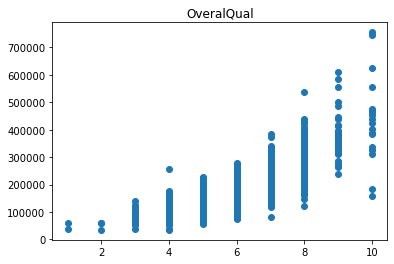

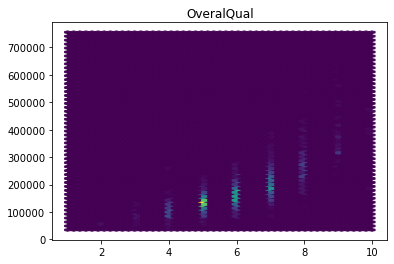

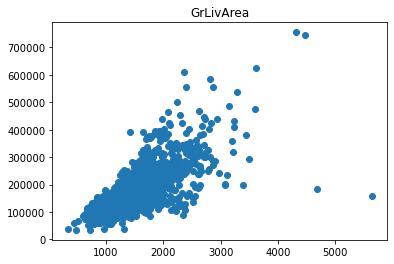

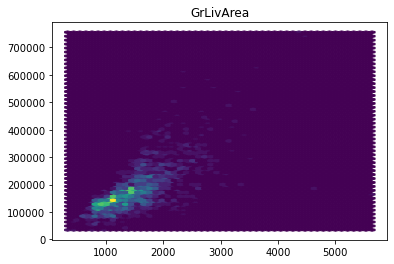

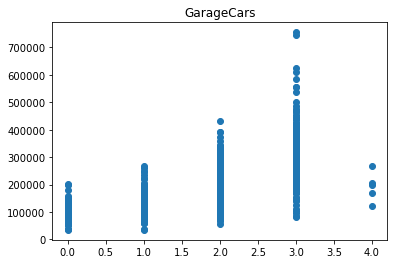

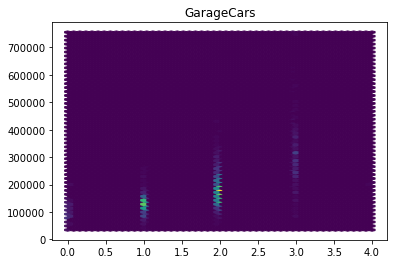

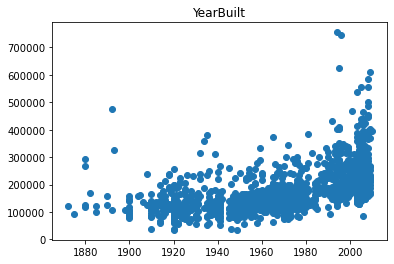

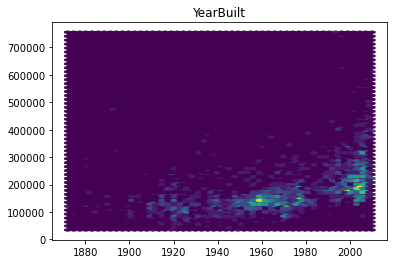

In [17]:
y = train_data['SalePrice']
x = train_data['OverallQual']
plt.scatter(x, y, marker='o')
plt.title("OveralQual")
plt.show()
plt.hexbin(x, y, gridsize=(50,50))
plt.title("OveralQual")
plt.show()
x = train_data['GrLivArea']
plt.scatter(x, y, marker='o')
plt.title("GrLivArea")
plt.show()
plt.hexbin(x, y, gridsize=(50,50))
plt.title("GrLivArea")
plt.show()
x = train_data['GarageCars']
plt.scatter(x, y, marker='o')
plt.title("GarageCars")
plt.show()
plt.hexbin(x, y, gridsize=(50,50))
plt.title("GarageCars")
plt.show()
x = train_data['YearBuilt']
plt.scatter(x, y, marker='o')
plt.title("YearBuilt")
plt.show()
plt.hexbin(x, y, gridsize=(50,50))
plt.title("YearBuilt")
plt.show()

##### Task7:

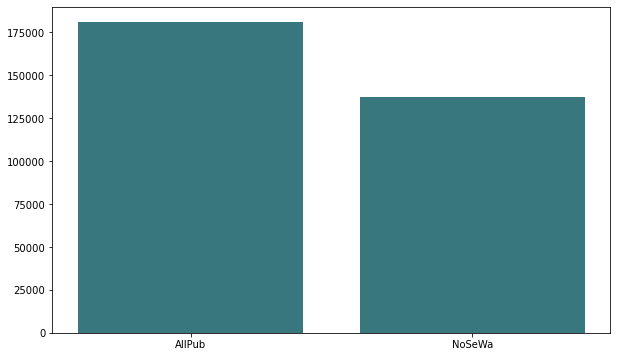

In [18]:
plt.subplots(figsize=(10,6))
utilities_effect = train_data.groupby('Utilities').mean()['SalePrice']
utilities_option = ['AllPub', 'NoSeWa']
freqs = Counter(utilities_option)
xvals = range(len(freqs.values()))
plt.bar(xvals, utilities_effect , color='#37777D')
plt.xticks(xvals, freqs.keys());

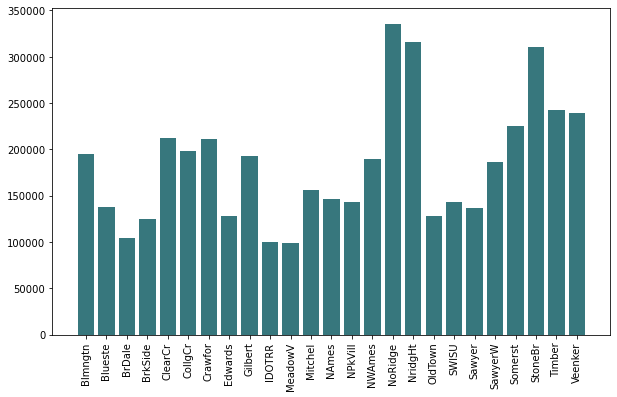

In [19]:
plt.subplots(figsize=(10,6))
neighborhood_effect = train_data.groupby('Neighborhood').mean()['SalePrice']
neighborhood_options = []
for index, value in neighborhood_effect.items():
    neighborhood_options.append(index)
freqs = Counter(neighborhood_options)
xvals = range(len(freqs.values()))
plt.bar(xvals, neighborhood_effect , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation=90);

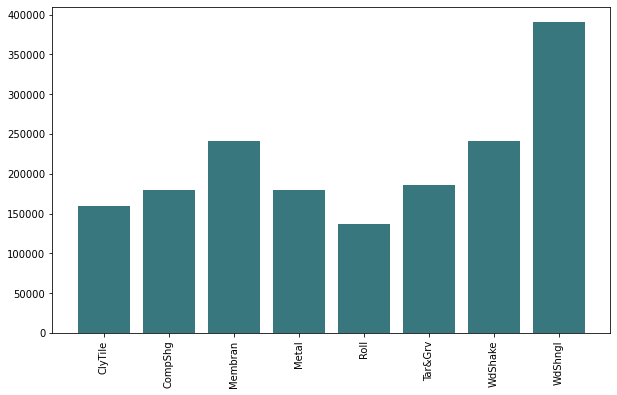

In [20]:
plt.subplots(figsize=(10,6))
roof_material_effect = train_data.groupby('RoofMatl').mean()['SalePrice']
roof_material_options = []
for index, value in roof_material_effect.items():
    roof_material_options.append(index)
freqs = Counter(roof_material_options)
xvals = range(len(freqs.values()))
plt.bar(xvals, roof_material_effect , color='#37777D')
plt.xticks(xvals, freqs.keys(), rotation=90);

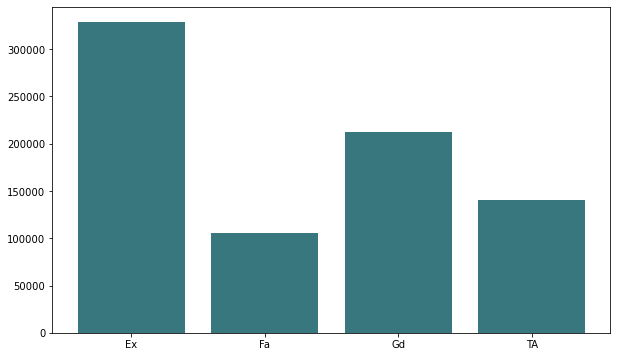

In [21]:
plt.subplots(figsize=(10,6))
kitchen_effect = train_data.groupby('KitchenQual').mean()['SalePrice']
kitchen_options = []
for index, value in kitchen_effect.items():
    kitchen_options.append(index)
freqs = Counter(kitchen_options)
xvals = range(len(freqs.values()))
plt.bar(xvals, kitchen_effect , color='#37777D')
plt.xticks(xvals, freqs.keys());

### Phase1

#### Types of missing values
We can classify the missing values in different types. Each type of missing value require slightly different handling. The main types are:
* Missing completely at Random (MCAR)
* Missing at Random (MAR)
* Missing Not at Random (MNAR)

As the name suggests <b>missing completely at random</b> means that there’s no relationship between whether a data point is missing and any values in the data set, missing or observed. The missing data is just a random subset of the data.

<b>Missing at random</b> means that the propensity of missing values has a systematic relationship with the observed data but not the missing data. Which means that the observation which is missing has nothing to do with the missing values but it has correlation with the observed variables. For example if you are taking a survey of mental disorders in men and women, it might be less likely that men will report their depression or vice-versa but it has nothing to do with their level of depression.

<b>Missing not at random</b> means that there is a distinct relationship between the propensity of a value to be missing and its values. So in our depression survey respondents with higher depression values fail to fill the survey because of their level of depression.

##### Task1:
How we can handle missing values? These are the ways:
* Drop missing values/columns/rows
* Imputation

The simplest way to go forward is to <b>drop the columns/rows</b> for which the data is not available. In the first two types of missing data, MCAR and MAR, in general, it is safe to remove the data with missing values depending upon their occurrences, while in the third case removing observations with missing values can produce a bias in the model.

A slightly better approach towards handling missing data is Imputation. Imputation means to replace or fill the missing data with some value. This aproach contains different methods:
* A constant value that belongs to the set of possible values of that variable, such as 0, distinct from all other values

    <i><b>Pros</b>:

    Works well with categorical features.

    <b>Cons</b>:

    It also doesn’t factor the correlations between features.

    It can introduce bias in the data.</i>

* A mean, median or mode value for the column

    <i><b>Pros</b>:
    
    Easy and fast.

    Works well with small numerical datasets.

    <b>Cons</b>:

    Doesn’t factor the correlations between features. It only works on the column level.

    Will give poor results on encoded categorical features (do NOT use it on categorical features).

    Not very accurate.

    Doesn’t account for the uncertainty in the imputations.</i>


* A value estimated by another predictive model

    We can use several prediction algorithms to predict the missing values. Lets see an example of using linear regression to predict the missing values. The predicted values from the model are inserted into the original dataframe. It theoretically provides good estimates for missing values. However, there are several disadvantages of this model which tend to outweigh the advantages. The replaced values are completely determined by a model applied to other variables and they tend to fit together too well, in other words, they contain no error. One must also assume that there is a linear relationship between the variables used in the regression equation which may not be the case always.

    <i><b>Pros</b>:
    
    More accurate

    <b>Cons</b>:

    It's hard and complicated.

    It's expensive.</i>

    
* Multiple Imputation

    Multiple imputation is generally the most accepted and most used method for imputing your data. Creating multiple imputations, as opposed to single imputations to complete datasets, accounts for the statistical uncertainty in the imputations. In simpler words multiple imputation narrows uncertainty about missing values by calculating several different options (imputations). Several versions of the same data set are created, which are then combined to make the best values. One of the most used method for imputation is known as MICE

    <i><b>Pros</b>:
    
    The most accurate

    <b>Cons</b>:

    It's hard and complicated.

    It's expensive.</i>

<b>Remarks:</b>

As we saw that the advanced imputation methods address the problem of missing data by exploiting the relationships between variables and they impute multiple values rather than a single value. Though the most preferred solution especially for big data sets depends on the computational resources, as well as tolerance to errors in approximating missing values and several other factors.

##### Task2:
As you remember the percentage of Nan values in each columns, there are columns that they have high we can remove those columns, because for predicting values we need to know other values in that column and we know that non-nan values in that column is not enough so if we predict we would not have good prediction.

In [22]:
columns_with_alot_nan = []
for index, value in percentage_of_nans.items():
    if value >= 40:
        columns_with_alot_nan.append(index)
if len(columns_with_alot_nan) > 0:
    train_data.drop(columns_with_alot_nan, axis=1, inplace=True)
    test_data.drop(columns_with_alot_nan, axis=1, inplace=True)

In [23]:
test_data['LotFrontage'].fillna(value=test_data['LotFrontage'].mean(), inplace=True)
test_data['MasVnrType'].fillna(value=test_data['MasVnrType'].mode()[0], inplace=True)
test_data['Exterior1st'].fillna(value=test_data['Exterior1st'].mode()[0], inplace=True)
test_data['Exterior2nd'].fillna(value=test_data['Exterior2nd'].mode()[0], inplace=True)
test_data['MSZoning'].fillna(value=test_data['MSZoning'].mode()[0], inplace=True)
test_data['KitchenQual'].fillna(value=test_data['KitchenQual'].mode()[0], inplace=True)
test_data['Functional'].fillna(value=test_data['Functional'].mode()[0], inplace=True)
test_data['Utilities'].fillna(value=test_data['Utilities'].mode()[0], inplace=True)
test_data['MasVnrArea'].fillna(value=test_data['MasVnrArea'].mean(), inplace=True)
test_data['SaleType'].fillna(value=test_data['SaleType'].mode()[0], inplace=True)
test_data['GarageYrBlt'].fillna(value=0, inplace=True)
test_data['BsmtFinSF1'].fillna(value=0, inplace=True)
test_data['BsmtFinSF2'].fillna(value=0, inplace=True)
test_data['BsmtUnfSF'].fillna(value=0, inplace=True)
test_data['TotalBsmtSF'].fillna(value=0, inplace=True)
test_data['BsmtFullBath'].fillna(value=0, inplace=True)
test_data['BsmtHalfBath'].fillna(value=0, inplace=True)
test_data['GarageCars'].fillna(value=0, inplace=True)
test_data['GarageArea'].fillna(value=0, inplace=True)
test_data['BsmtExposure'].fillna(value="Ne", inplace=True)
test_data.fillna(value="No", inplace=True)

In [24]:
train_data['LotFrontage'].fillna(value=train_data['LotFrontage'].mean(), inplace=True)
train_data['MasVnrType'].fillna(value=train_data['MasVnrType'].mode()[0], inplace=True)
train_data['MasVnrArea'].fillna(value=train_data['MasVnrArea'].mode()[0], inplace=True)
train_data['Electrical'].fillna(value=train_data['Electrical'].mode()[0], inplace=True)
train_data['GarageYrBlt'].fillna(value=0, inplace=True)
train_data['BsmtExposure'].fillna(value="Ne", inplace=True)
train_data.fillna(value="No", inplace=True)

##### Task3:
<b>“Rescaling”</b> a vector means to add or subtract a constant and then multiply or divide by a constant, as you would do to change the units of measurement of the data, for example, to convert a temperature from Celsius to Fahrenheit.

<b>“Normalizing”</b> a vector most often means dividing by a norm of the vector. It also often refers to rescaling by the minimum and range of the vector, to make all the elements lie between 0 and 1 thus bringing all the values of numeric columns in the dataset to a common scale.

<b>“Standardizing”</b> a vector most often means subtracting a measure of location and dividing by a measure of scale. For example, if the vector contains random values with a Gaussian distribution, you might subtract the mean and divide by the standard deviation, thereby obtaining a “standard normal” random variable with mean 0 and standard deviation 1.

Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability.

Similarly, the goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

For example, consider a data set containing two features, age, and income(x2). Where age ranges from 0–100, while income ranges from 0–100,000 and higher. Income is about 1,000 times larger than age. So, these two features are in very different ranges. When we do further analysis, like multivariate linear regression, for example, the attributed income will intrinsically influence the result more due to its larger value. But this doesn’t necessarily mean it is more important as a predictor. So we normalize the data to bring all the variables to the same range.

Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

Standardization assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

Also in out dataset we have these problem so we do standardizing using (or Z-score normalization),  means centering the variable at zero and standardizing the variance at 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:
The result of standardization is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with

```
μ=0 and σ=1
```

In [25]:
standardizing_columns = ['LotFrontage', 'LotArea', 'MasVnrArea',
                        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                        'BsmtHalfBath', 'FullBath', 'HalfBath',
                        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                        'Fireplaces', 'GarageCars', 'GarageArea',
                        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                        '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
for col in standardizing_columns:
    train_data[col] = (train_data[col]-train_data[col].mean())/train_data[col].std()
    test_data[col] = (test_data[col]-test_data[col].mean())/test_data[col].std()

##### Task4:
Categorical data is a common type of non-numerical data that contains label values and not numbers. A categorical variable is a variable that can take on one of a limited, and usually fixed number of possible values.

There are several different types of categorical data including:
* <b>Binary</b>:  A variable that has only 2 values. For example, True/False or Yes/No.
* <b>Ordinal</b>: A variable that has some order associated with it.
* <b>Nominal</b>: A variable that has no numerical importance, for example color or city.

Binary features are those with only two possible values. For this we can use `replace` method of pandas.

Ordinal features are those with some order associated with them. We can tell from the sample of ordinal features below these features have an order that may be important. While there are many methods for integer encoding, we will discuss two here:
* Sklearn’s `LabelEncoder()` -> <b>this is what we use</b>
* Panda’s `map()`

Nominal features are categorical features that have no numerical importance. Order does not matter.
Image for post. One-hot encoding is a better technique when order doesn’t matter. You can use pandas `get_dummies` method.

In [26]:
ordinal_cats = [ 'LandContour', 'Utilities', 'LandSlope',
                'ExterQual', 'ExterCond', 'BsmtQual',
                'SaleCondition', 'BsmtCond', 'BsmtExposure',                
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                'KitchenQual', 'GarageFinish', 'FireplaceQu',
                'GarageQual', 'GarageCond', 'PavedDrive',
                'Street', 'PoolQC', 'Fence', 'Alley']

nominal_cats = [ 'MSZoning', 'LotShape', 'LotConfig',
                'Neighborhood', 'Condition1', 'Condition2',
                'BldgType', 'HouseStyle', 'RoofStyle',
                'RoofMatl', 'Exterior1st', 'Exterior2nd',
                'MasVnrType', 'Foundation', 'Heating',
                'Electrical', 'Functional', 'GarageType',
                'SaleType', 'MiscFeature']

train_data['CentralAir'] = train_data['CentralAir'].replace({'Y':1, 'N':0})
test_data['CentralAir'] = test_data['CentralAir'].replace({'Y':1, 'N':0})

label_encoder = LabelEncoder()
for category in ordinal_cats:
    train_data[category] = label_encoder.fit_transform(train_data[category])
    test_data[category] = label_encoder.fit_transform(test_data[category])

train_data = pd.get_dummies(train_data, columns=nominal_cats)
test_data = pd.get_dummies(test_data, columns=nominal_cats)

##### Task5:
Now we want to remove unnecessary columns. Our target column is `SalePrice` column. When correlation coefficient is around zero, we can conclude that these variables does not have influence one each other, but when correlation coefficient is around +1 and -1 we can say that one of has the effect on the output, so we can remove one of them. So here after changes we made, we make a new correlation coefficent matrix for all features and as we said before, this matrix is symmetric, so we just use upper triangle(It better than bottom traingle because it works with columns than rows).

Then we loop on columns and if one of columns had correlation with more that special threshhold, we can say that there is another feature that introduce that for us, so we can remove that column.

##### Task6:
In statistics and machine learning we usually split our data into two subsets: training data and testing data (and sometimes to three: train, validate and test), and fit our model on the train data, in order to make predictions on the test data. When we do that, one of two thing might happen: we overfit our model or we underfit our model. We don’t want any of these things to happen, because they affect the predictability of our model — we might be using a model that has lower accuracy and/or is ungeneralized (meaning you can’t generalize your predictions on other data).

We will introduce `Overfitting` and `Overfitting` in next phase.
<br>
<br>
<br>
![image info](1.png)
<br>
<br>

As I said before, the data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

One way to splitting dataset is choose `P` percent of dataset as train and other for test.
<br>
<br>
<br>
![image info](2.png)
<br>
<br>

But about `P`:

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

Common split percentages:
* 80:20
* 67:33
* 50:50

Another important consideration is that rows are assigned to the train and test sets randomly.

This is done to ensure that datasets are a representative sample (e.g. random sample) of the original dataset, which in turn, should be a representative sample of observations from the problem domain.

<b>Train/test</b> split does have its dangers — what if the split we make isn’t random? What if one subset of our data has only people from a certain state, employees with a certain income level but not other income levels, only women or only people at a certain age? (imagine a file ordered by one of these). This will result in overfitting, even though we’re trying to avoid it! This is where <b>cross validation</b> comes in.

Another way is <b>Cross Validation</b>.

<b>Cross Validation</b> is very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.
<br>
<br>
<br>
![image info](4.png)
<br>
<br>
There are a bunch of cross validation methods, I’ll go over two of them: the first is <b>K-Folds Cross Validation</b> and the second is <b>Leave One Out Cross Validation (LOOCV)</b>

<b>K-Folds Cross Validation</b>

In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.
<br>
<br>
<br>
![image info](5.png)
<br>
<br>
The key configuration parameter for k-fold cross-validation is k that defines the number folds in which to split a given dataset. Common values are k=3, k=5, and k=10, and by far the most popular value used in applied machine learning to evaluate models is k=10. The reason for this is studies were performed and k=10 was found to provide good trade-off of low computational cost and low bias in an estimate of model performance.

The expectation is that low values of k will result in a noisy estimate of model performance and large values of k will result in a less noisy estimate of model performance.

<b>Leave One Out Cross Validation (LOOCV)</b>

In this type of cross validation, the number of folds (subsets) equals to the number of observations we have in the dataset. We then average ALL of these folds and build our model with the average. We then test the model against the last fold. Because we would get a big number of training sets (equals to the number of samples), this method is very computationally expensive and should be used on small datasets. If the dataset is big, it would most likely be better to use a different method, like kfold.
<br>
<br>
<br>
<img src="6.png" width="500"/>
<br>
<br>
As defined also we can call it <b>n-fold corss validation.</b>
<b>Prons and Cons:</b>
* best possible classifier learned: n-1 training example
* high computational cost: re-learn everything n times
    * not an issue for instance-based methods like kNN
    * there are tricks to make such learning faster
* classes not balanced in training/testing sets
    * not attributes, 2 equi-probable classes -> wrong 100% of the time

In [27]:
zero_list = [0 for i in range(len(test_data))]
for col in train_data.columns:
    if col == "SalePrice":
        continue
    if col not in test_data.columns:
        test_data[col] = zero_list

In [28]:
cols = []
for col in train_data.columns:
    if col != "SalePrice":
        cols.append(col)
test_data = test_data[cols]
temp_sale_price = train_data['SalePrice']
train_data = train_data[cols]
train_data['SalePrice'] = temp_sale_price
diffs = {}
for col in test_data.columns:
    if str(test_data.dtypes[col]) != str(train_data.dtypes[col]):
        diffs[col] = str(train_data.dtypes[col])
test_data = test_data.astype(diffs)

In [29]:
correlations = train_data.drop(['SalePrice'], axis=1).corr().abs()
upper_tri_correlations = correlations.where(np.triu(np.ones(correlations.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri_correlations.columns if any(upper_tri_correlations[column] > 0.95)]
correlations = train_data.corr().abs()['SalePrice']
train_data.drop(to_drop, axis=1, inplace=True)
test_data.drop(to_drop, axis=1, inplace=True)

In [30]:
Y = train_data.SalePrice
X_train_p, X_test_p, Y_train_p, Y_test_p = train_test_split(train_data.drop(["SalePrice"], axis=1), Y, test_size=0.2)
print("Shape of train input and output: ", X_train_p.shape, Y_train_p.shape)
print("Shape of test input and output: ", X_test_p.shape, Y_test_p.shape)
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(train_data)
kf_splits = []
for itrain, itest in kf.split(train_data):
    X_train_k = train_data.iloc[itrain].drop(['SalePrice'], axis=1)
    X_test_k = train_data.iloc[itest].drop(['SalePrice'], axis=1)
    Y_train_k = train_data.iloc[itrain]['SalePrice']
    Y_test_k = train_data.iloc[itest]['SalePrice']
    kf_splits.append((X_train_k, X_test_k, Y_train_k, Y_test_k))

Shape of train input and output:  (1168, 216) (1168,)
Shape of test input and output:  (292, 216) (292,)


### Phase2:

In [32]:
isSet = False
best_mea = 0
best_rmse = 0
for kf_split in kf_splits:
    lm = linear_model.LinearRegression()
    model = lm.fit(kf_split[0], kf_split[2])
    predictions = lm.predict(kf_split[1])
    mea = mean_absolute_error(kf_split[3], predictions)
    rmse = sqrt(mean_squared_error(kf_split[3], predictions))
    print("MEA: ",mea, end=", RMSE: ")
    print(rmse)
    if isSet == False:
        best_mea = mea
        best_rmse = rmse
        best_linear = kf_split
        isSet = True
    elif best_mea + best_rmse > mea + rmse:
        best_mea = mea
        best_rmse = rmse
        best_linear = kf_split
print("Best MEA: ",best_mea, "and best RMSE: ", best_rmse)

MEA:  19118.777958757368, RMSE: 31894.025624746104
MEA:  17269.71256956115, RMSE: 26041.18072007094
MEA:  17891.894601034892, RMSE: 26680.828274790838
MEA:  17177.096992329956, RMSE: 23384.6011691076
MEA:  16445.949053273653, RMSE: 31352.506304433453
MEA:  17900.24857194755, RMSE: 25771.395165388196
MEA:  23864.597677589576, RMSE: 64762.88862959064
MEA:  19596.691220062614, RMSE: 27250.40655657864
MEA:  18338.952411222162, RMSE: 28465.886762353013
MEA:  19833.900233701937, RMSE: 42067.52076641847
Best MEA:  17177.096992329956 and best RMSE:  23384.6011691076


MEA:  15057.635001712593, RMSE= 23503.52431031451


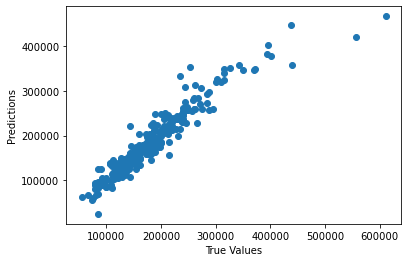

In [33]:
lm = linear_model.LinearRegression()
model = lm.fit(best_linear[0], best_linear[2])
predictions1 = lm.predict(X_test_p)
test_predictions1 = lm.predict(test_data)
print("MEA: ", mean_absolute_error(Y_test_p, predictions1), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions1)))
plt.scatter(Y_test_p, predictions1)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

In [34]:
isSet = False
best_mea = 0
best_rmse = 0
knn = KNeighborsRegressor(n_neighbors = 2)
for kf_split in kf_splits:
    knn.fit(kf_split[0], kf_split[2])
    predictions = knn.predict(kf_split[1])
    mea = mean_absolute_error(kf_split[3], predictions)
    rmse = sqrt(mean_squared_error(kf_split[3], predictions))
    print("MEA: ",mea, end=", RMSE: ")
    print(rmse)
    if isSet == False:
        best_mea = mea
        best_rmse = rmse
        best_knn = kf_split
        isSet = True
    elif best_mea + best_rmse > mea + rmse:
        best_mea = mea
        best_rmse = rmse
        best_knn = kf_split
print("Best MEA: ",best_mea, "and best RMSE: ", best_rmse)

MEA:  25380.26712328767, RMSE: 44428.41940984227
MEA:  26258.79109589041, RMSE: 37906.40236781764
MEA:  28290.585616438355, RMSE: 40700.98145422698
MEA:  26576.181506849316, RMSE: 37191.311710923954
MEA:  29726.496575342466, RMSE: 45600.888528410054
MEA:  34308.94520547945, RMSE: 54168.07049028432
MEA:  32853.609589041094, RMSE: 47872.44718430826
MEA:  28465.44178082192, RMSE: 44435.52780543518
MEA:  34459.55479452055, RMSE: 51951.76577961391
MEA:  27053.294520547945, RMSE: 43274.34045741162
Best MEA:  26576.181506849316 and best RMSE:  37191.311710923954


MEA:  18946.585616438355, RMSE= 27970.29599454143


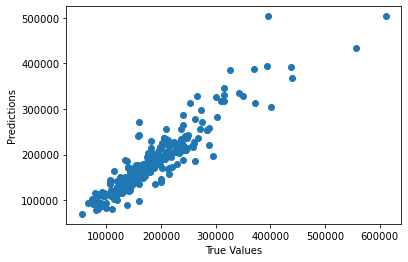

In [35]:
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(best_knn[0], best_knn[2])
predictions = knn.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  25820.584931506848, RMSE= 36461.8506010866


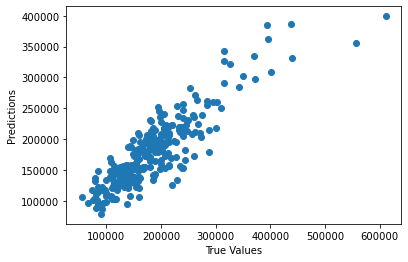

In [36]:
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(best_knn[0], best_knn[2])
predictions = knn.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  23743.50890410959, RMSE= 33553.31870478381


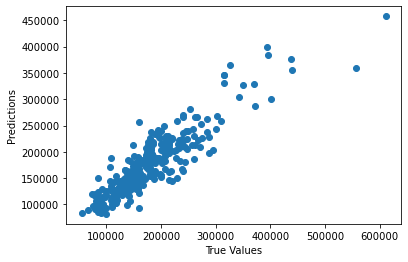

In [37]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(best_knn[0], best_knn[2])
predictions = knn.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  22927.57705479452, RMSE= 32660.699219745562


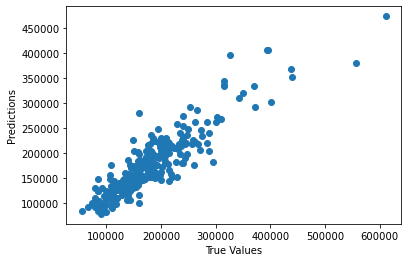

In [38]:
knn = KNeighborsRegressor(n_neighbors = 4)
knn.fit(best_knn[0], best_knn[2])
predictions = knn.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  25005.104696673192, RMSE= 35269.97852187811


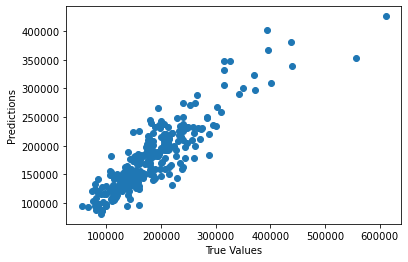

In [39]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(best_knn[0], best_knn[2])
predictions = knn.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  2015.9828767123288, RMSE= 8920.907377715612


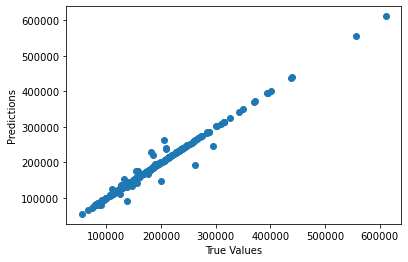

In [40]:
knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(best_knn[0], best_knn[2])
predictions2 = knn.predict(X_test_p)
test_predictions2 = knn.predict(test_data)
print("MEA: ", mean_absolute_error(Y_test_p, predictions2), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions2)))
plt.scatter(Y_test_p, predictions2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

In [41]:
isSet = False
best_mea = 0
best_rmse = 0
dt = DecisionTreeRegressor(max_depth=80)
for kf_split in kf_splits:
    dt.fit(kf_split[0], kf_split[2])
    predictions = dt.predict(kf_split[1])
    mea = mean_absolute_error(kf_split[3], predictions)
    rmse = sqrt(mean_squared_error(kf_split[3], predictions))
    print("MEA: ",mea, end=", RMSE: ")
    print(rmse)
    if isSet == False:
        best_mea = mea
        best_rmse = rmse
        best_dt = kf_split
        isSet = True
    elif best_mea + best_rmse > mea + rmse:
        best_mea = mea
        best_rmse = rmse
        best_dt = kf_split
print("Best MEA: ",best_mea, "and best RMSE: ", best_rmse)

MEA:  25432.41780821918, RMSE: 41678.0658295766
MEA:  21928.780821917808, RMSE: 31040.24078669317
MEA:  26946.678082191782, RMSE: 41032.93793054951
MEA:  25430.609589041094, RMSE: 35393.90652696769
MEA:  22776.787671232876, RMSE: 34752.82466069859
MEA:  24893.986301369863, RMSE: 35445.266228176384
MEA:  32636.45890410959, RMSE: 55625.42226202662
MEA:  25493.904109589042, RMSE: 37661.778626183754
MEA:  28825.664383561645, RMSE: 44678.3254618539
MEA:  24240.164383561645, RMSE: 41463.23485668746
Best MEA:  21928.780821917808 and best RMSE:  31040.24078669317


MEA:  2529.123287671233, RMSE= 10270.34267645344


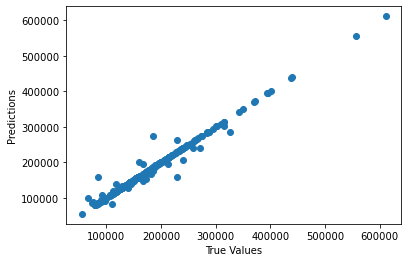

In [42]:
dt = DecisionTreeRegressor(max_depth=80)
dt.fit(best_dt[0], best_dt[2])
predictions = dt.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  8397.377130047385, RMSE= 13541.403592668301


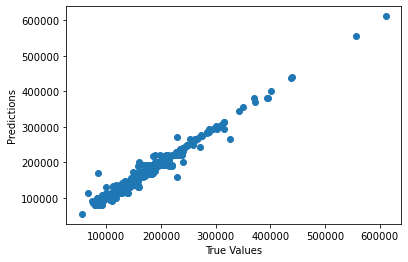

In [43]:
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(best_dt[0], best_dt[2])
predictions = dt.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  2377.791095890411, RMSE= 9673.240361911568


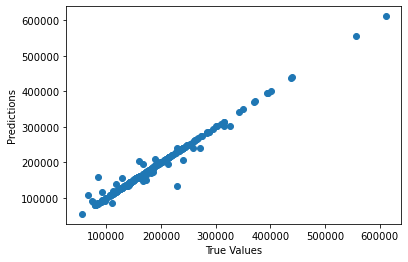

In [44]:
dt = DecisionTreeRegressor(max_depth=100)
dt.fit(best_dt[0], best_dt[2])
predictions = dt.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  2849.9075342465753, RMSE= 11774.057677298688


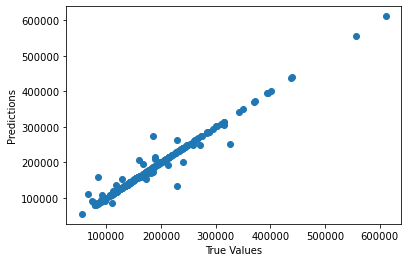

In [45]:
dt = DecisionTreeRegressor(max_depth=75)
dt.fit(best_dt[0], best_dt[2])
predictions3 = dt.predict(X_test_p)
test_predictions3 = dt.predict(test_data)
print("MEA: ", mean_absolute_error(Y_test_p, predictions3), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions3)))
plt.scatter(Y_test_p, predictions3)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  2827.428082191781, RMSE= 10807.248313021917


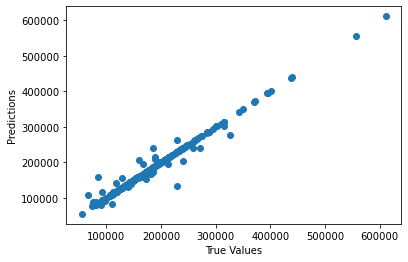

In [46]:
dt = DecisionTreeRegressor(max_depth=40)
dt.fit(best_dt[0], best_dt[2])
predictions = dt.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  23383.206935399256, RMSE= 31273.213951980964


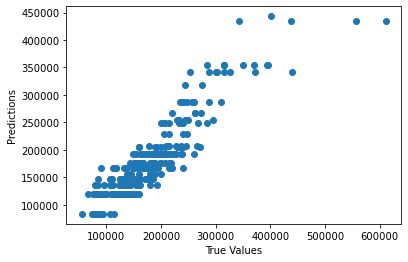

In [47]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(best_dt[0], best_dt[2])
predictions = dt.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  2690.9897260273974, RMSE= 11049.178377220807


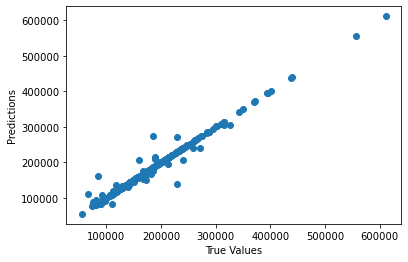

In [48]:
dt = DecisionTreeRegressor(max_depth=30)
dt.fit(best_dt[0], best_dt[2])
predictions = dt.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

##### Task3:
Overfitting in Machine Learning

Overfitting refers to a model that models the training data too well.

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

Overfitting is more likely with nonparametric and nonlinear models that have more flexibility when learning a target function. As such, many nonparametric machine learning algorithms also include parameters or techniques to limit and constrain how much detail the model learns.

For example, decision trees are a nonparametric machine learning algorithm that is very flexible and is subject to overfitting training data. This problem can be addressed by pruning a tree after it has learned in order to remove some of the detail it has picked up.
Underfitting in Machine Learning

Underfitting refers to a model that can neither model the training data nor generalize to new data.

An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.

Underfitting is often not discussed as it is easy to detect given a good performance metric. The remedy is to move on and try alternate machine learning algorithms. Nevertheless, it does provide a good contrast to the problem of overfitting.

Also I should mention that because using Kford we do not have overfitting and underfitting.

##### Task5:
<b>Influence of preprocessing:</b>

We did different preprocesses. One of them was filling `Nan` datas. I removed that part but it does not have any good result. Also I removed the part for removing unnecessary columns. Also it was not good.

Also I tried different ways for handling missing datas. I think what I did is the best thing. Another preprocessing was splitting data. That was useful too.

Last part that I want to mention here is that using normlizion was not that much useful here in this dataset.

### Phase3:

##### Task 1:
<b>Random forest</b> is an ensemble of decision tree algorithms.

It is an extension of bootstrap aggregation (bagging) of decision trees and can be used for classification and regression problems.

In bagging, a number of decision trees are created where each tree is created from a different bootstrap sample of the training dataset. A bootstrap sample is a sample of the training dataset where a sample may appear more than once in the sample, referred to as sampling with replacement.

Bagging is an effective ensemble algorithm as each decision tree is fit on a slightly different training dataset, and in turn, has a slightly different performance. Unlike normal decision tree models, such as classification and regression trees (CART), trees used in the ensemble are unpruned, making them slightly overfit to the training dataset. This is desirable as it helps to make each tree more different and have less correlated predictions or prediction errors.

Predictions from the trees are averaged across all decision trees resulting in better performance than any single tree in the model.

<b>Hyper Paramters:</b>
1. n_estimators: The n_estimators parameter specifies the number of trees in the forest of the model. The default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest.

2. max_depth: The max_depth parameter specifies the maximum depth of each tree. The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class.

There are more but I used top parameters. You can see result below:

In [49]:
isSet = False
best_mea = 0
best_rmse = 0
rf = RandomForestRegressor(n_estimators=60, max_depth=100)
for kf_split in kf_splits:
    rf.fit(kf_split[0], kf_split[2])
    predictions = rf.predict(kf_split[1])
    mea = mean_absolute_error(kf_split[3], predictions)
    rmse = sqrt(mean_squared_error(kf_split[3], predictions))
    print("MEA: ",mea, end=", RMSE: ")
    print(rmse)
    if isSet == False:
        best_mea = mea
        best_rmse = rmse
        best_rf = kf_split
        isSet = True
    elif best_mea + best_rmse > mea + rmse:
        best_mea = mea
        best_rmse = rmse
        best_rf = kf_split
print("Best MEA: ",best_mea, "and best RMSE: ", best_rmse)

MEA:  16918.497716894977, RMSE: 30620.5076824793
MEA:  16086.606735159818, RMSE: 22096.77131557499
MEA:  18122.421347031963, RMSE: 28515.42922711693
MEA:  14490.465182648404, RMSE: 20564.854724029618
MEA:  16340.386872146119, RMSE: 28784.01889645724
MEA:  17846.244292237447, RMSE: 26514.78093011787
MEA:  21614.381506849313, RMSE: 39447.6530509526
MEA:  16489.162557077627, RMSE: 24196.842999559645
MEA:  19517.845433789957, RMSE: 31771.795849438207
MEA:  18789.78139269406, RMSE: 40112.808490167015
Best MEA:  14490.465182648404 and best RMSE:  20564.854724029618


MEA:  7154.649029680367, RMSE= 10991.464799165173


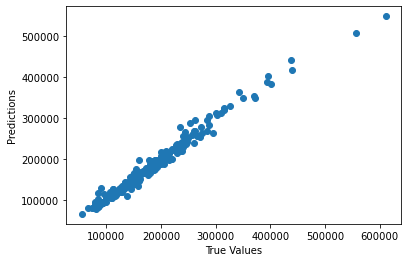

In [50]:
model = RandomForestRegressor(n_estimators=60, max_depth=100)
model.fit(best_rf[0], best_rf[2])
predictions = model.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  7361.331378424658, RMSE= 11115.82167783706


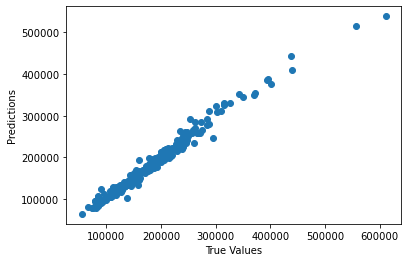

In [51]:
model = RandomForestRegressor(n_estimators=80, max_depth=100)
model.fit(best_rf[0], best_rf[2])
predictions = model.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  7220.805787671233, RMSE= 10967.871952756592


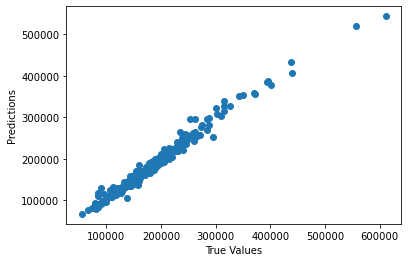

In [52]:
model = RandomForestRegressor(n_estimators=100, max_depth=100)
model.fit(best_rf[0], best_rf[2])
predictions = model.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  7809.062671232876, RMSE= 11904.999165793093


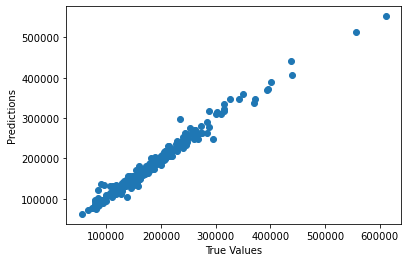

In [53]:
model = RandomForestRegressor(n_estimators=20, max_depth=100)
model.fit(best_rf[0], best_rf[2])
predictions = model.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  8357.532876712328, RMSE= 12364.55202825056


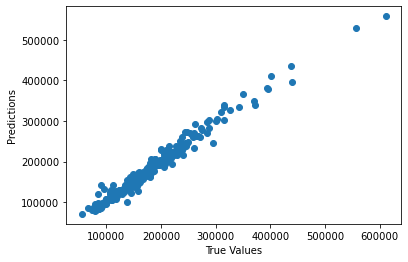

In [54]:
model = RandomForestRegressor(n_estimators=10, max_depth=100)
model.fit(best_rf[0], best_rf[2])
predictions = model.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  7531.352739726028, RMSE= 11199.533159429502


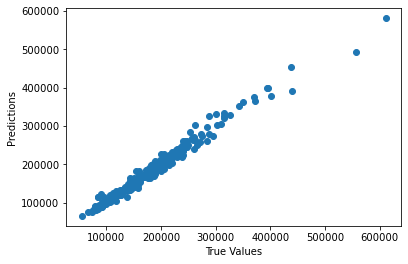

In [55]:
model = RandomForestRegressor(n_estimators=20, max_depth=100)
model.fit(best_rf[0], best_rf[2])
predictions = model.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  7096.658595890412, RMSE= 10784.440753572057


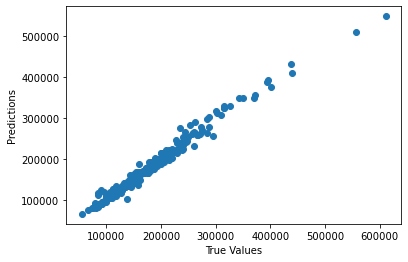

In [56]:
model = RandomForestRegressor(n_estimators=100, max_depth=50)
model.fit(best_rf[0], best_rf[2])
predictions4 = model.predict(X_test_p)
test_predictions4 = model.predict(test_data)
print("MEA: ", mean_absolute_error(Y_test_p, predictions4), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions4)))
plt.scatter(Y_test_p, predictions4)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  6956.934554794521, RMSE= 10608.327953573978


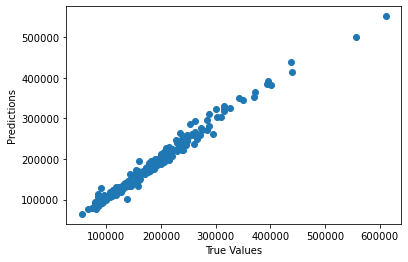

In [57]:
model = RandomForestRegressor(n_estimators=100, max_depth=70)
model.fit(best_rf[0], best_rf[2])
predictions = model.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  8727.96183534707, RMSE= 11943.926678365699


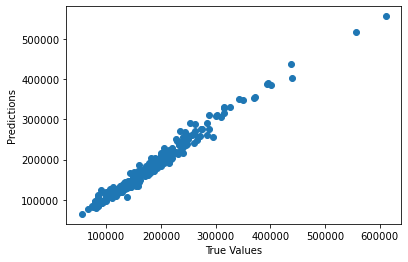

In [58]:
model = RandomForestRegressor(n_estimators=100, max_depth=10)
model.fit(best_rf[0], best_rf[2])
predictions = model.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  7515.693698630137, RMSE= 11341.543208266685


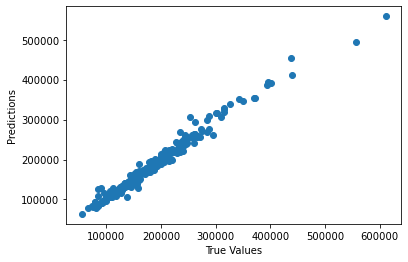

In [59]:
model = RandomForestRegressor(n_estimators=100, max_depth=30)
model.fit(best_rf[0], best_rf[2])
predictions = model.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  7011.754828767123, RMSE= 10560.890947763794


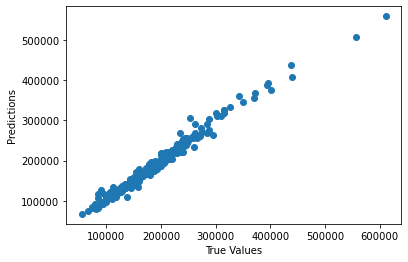

In [60]:
model = RandomForestRegressor(n_estimators=100, max_depth=35)
model.fit(best_rf[0], best_rf[2])
predictions = model.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

MEA:  7162.124965753424, RMSE= 10630.778318331244


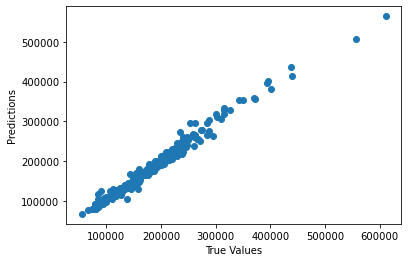

In [61]:
model = RandomForestRegressor(n_estimators=100, max_depth=40)
model.fit(best_rf[0], best_rf[2])
predictions = model.predict(X_test_p)
print("MEA: ", mean_absolute_error(Y_test_p, predictions), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predictions)))
plt.scatter(Y_test_p, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

##### Task2:

MEA:  5876.666347186574, RMSE= 9101.249825617773


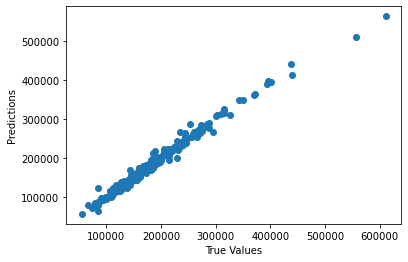

In [62]:
predicts = []
for i in range(len(predictions1)):
    sumOfPredicts = predictions1[i] + predictions2[i] + predictions3[i]
    predicts.append(sumOfPredicts/3)
predicts = np.array(predicts)
print("MEA: ", mean_absolute_error(Y_test_p, predicts), end=", RMSE= ")
print(sqrt(mean_squared_error(Y_test_p, predicts)))
plt.scatter(Y_test_p, predicts)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show();

##### Task3:
A voting regressor is an ensemble meta-estimator that fits base
regressors each on the whole dataset. It, then, averages the individual
predictions to form a final prediction.

It is a technique that may be used to improve model performance, ideally achieving better performance than any single model used in the ensemble.

Hard voting involves summing the predictions for each class label and predicting the class label with the most votes. Soft voting involves summing the predicted probabilities (or probability-like scores) for each class label and predicting the class label with the largest probability.

* <b>Hard Voting</b>. Predict the class with the largest sum of votes from models
* <b>Soft Voting</b>. Predict the class with the largest summed probability from models.

A voting ensemble may be considered a meta-model, a model of models.

A limitation of the voting ensemble is that it treats all models the same, meaning all models contribute equally to the prediction. This is a problem if some models are good in some situations and poor in others.

An extension to the voting ensemble to address this problem is to use a weighted average or weighted voting of the contributing models. This is sometimes called blending. A further extension is to use a machine learning model to learn when and how much to trust each model when making predictions. This is referred to as stacked generalization, or stacking for short.

As we see in out result, we have better result in voting regressor. That is because when using voting regressor, we make a prediction between different predictions. So as a result, new prediction is between far prediction of our models and near prediction of our models, this can decrease bias and variance. As mentioned above, this method has its weaknesses and maybe it does not reduce bias and variance. As we can see here our variance is more than the best variance that was for our best KNN model, on the other hand it has decreased bias.

In [64]:
predicts = []
for i in range(len(test_predictions1)):
    sumOfPredicts = test_predictions1[i] + test_predictions2[i] + test_predictions3[i] + test_predictions4[i]
    predicts.append(sumOfPredicts/4)
predicts = np.array(predicts)
np.savetxt("finalResult.csv", predicts, delimiter=",")